# Bayesian Monthly Sensitivity Model

In [122]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import nest_asyncio
nest_asyncio.apply()
import stan


%matplotlib inline

In [123]:
states=['Aberdeenshire', 'Norfolk']

In [124]:
# for use with big df with all counties
wheat_temp=pd.read_csv('/Users/aa2572/Code/SimFarm2030/notebooks/Wheat_AllCntys_temp_anom.csv',  delimiter=',', index_col=[0,1])
idx=pd.IndexSlice
temp_states = wheat_temp.loc[idx[states,:], :]

In [13]:
temp_states=[]
for i,s in enumerate(states):
    wheat_temp=pd.read_csv('/Users/aa2572/Code/SimFarm2030/notebooks/Wheat_AllCntys_temp_anom.csv',  delimiter=',', index_col=[0,1])
    # wheat_temp.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)
    temp_states.append(wheat_temp)
temp_states=pd.concat(temp_states,keys=states)

In [125]:
temp_states.shape

(276, 12)

In [104]:
# gives the temp anomalies by year/month
temp_states.head()

Jan       Feb       Mar       Apr       May  \
County                                                                 
Aberdeenshire 1918 -2.493073  1.068602 -0.946840 -2.491409 -0.583317   
              1894 -1.702853 -0.873215 -0.301668 -0.481779 -3.949938   
              1924 -0.588173 -0.510332 -3.621431 -2.283165 -3.128035   
              1957  0.145186 -1.593237  0.948568 -0.684668 -2.704912   
              1999 -0.328126 -0.809753 -0.062614 -0.228225 -0.952086   

                         Jun       Jul       Aug       Sep       Oct  \
County                                                                 
Aberdeenshire 1918 -2.261171 -2.549935 -1.457484 -4.527486 -1.684323   
              1894 -2.788482 -1.737947 -2.796368 -3.167809 -3.069655   
              1924 -2.787276 -2.370185 -2.808873 -2.556811 -1.849153   
              1957 -1.686406 -2.436728 -2.602144 -3.176220 -1.178618   
              1999 -2.149224 -1.015089 -2.069172  0.166891 -0.520042   

                         Nov       Dec  
County                                  
Aberdeenshire 1918 -2.409515 -0.653161  
              1894 -0.173020 -1.337713  
              1924 -0.081145  1.444178  
              1957 -0.764701 -1.313555  
              1999 -0.072992 -2.220801

In [126]:
yields=pd.read_table('/Users/aa2572/Code/SimFarm2030/notebooks/Wheat_median_yield_anom.csv', delimiter=',', index_col=0)
yields = yields.drop(columns=['location_avg','location_median'])

In [127]:
# type(yields.columns)  => pandas.core.indexes.base.Index
good_yrs = yields.columns.astype(np.int64)
good_yrs

Int64Index([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017],
           dtype='int64')

In [128]:
# filter temp states
# temp_states.loc['Norfolk', :].index - not strings
# temp_state = temp_states.loc['Norfolk'].loc[good_yrs] - > correct, same as below.

# temp_states.xs(good_yrs, level=1)  2013, 2014, 2015, 2016, 2017], dtype='int64')' is an invalid key
temp_state = temp_states.loc[(states,good_yrs),:]

In [129]:
temp_state.head()

Jan       Feb       Mar       Apr       May  \
County                                                                 
Aberdeenshire 2002 -0.007965 -0.025607 -0.163259 -0.444801 -0.716103   
              2003 -0.198551 -1.022673  0.596262  0.019557 -0.750410   
              2004 -0.296895 -0.159561 -0.443990  0.248019 -0.415128   
              2005  1.033442 -0.373199  0.316751 -0.779215 -1.926687   
              2006  0.099153 -0.535175 -2.817811 -1.295431 -1.669308   

                         Jun       Jul       Aug       Sep       Oct  \
County                                                                 
Aberdeenshire 2002 -1.216476 -1.954118 -0.562503 -0.857097 -2.539831   
              2003  0.088557  0.101756 -0.205933 -1.002988 -2.113776   
              2004 -0.639130 -2.332567 -0.575324 -0.836355 -0.996954   
              2005 -0.643813 -1.171255 -1.574062 -0.534542  0.243862   
              2006 -0.356085  0.884575 -1.091058  0.790412  0.752131   

                         Nov       Dec  
County                                  
Aberdeenshire 2002  0.341029  0.372330  
              2003  0.189557 -0.783554  
              2004 -0.165076 -0.200085  
              2005 -1.315700 -0.311311  
              2006  0.065860 -0.508561

In [130]:
# Compile model
with open('stan/BMSM-simp.stan', 'r') as f:
    model = f.read()
# sm = stan.build(f, data=data)


In [131]:
yields.shape

(42, 16)

In [132]:
yields.iloc[0:5].head()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
LO_COUNTY,,,,,,,,,,,,,,,,
Aberdeenshire,-0.469254,0.340877,0.000000,0.992743,1.425023,-0.361947,0.729544,0.737079,1.129914,-0.341925,-1.970368,-1.162652,0.382208,-0.354387,0.079028,-1.190857
Angus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.559555,-0.559555
Bedfordshire,NaN,-0.328671,1.070562,-0.335532,2.576550,NaN,NaN,NaN,NaN,-1.339554,NaN,NaN,NaN,NaN,NaN,NaN
Cambridgeshire,0.810413,0.359545,0.255815,0.000000,-0.922769,0.551350,1.928903,-0.665643,-1.047781,-2.093035,-0.006653,-1.133856,2.950376,-0.205140,0.400854,-1.045681
Cheshire,NaN,NaN,NaN,NaN,NaN,-2.647102,0.326096,NaN,-0.408714,NaN,-0.802789,1.677988,0.212070,1.303284,-0.260666,0.059983


In [133]:
yields.head()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
LO_COUNTY,,,,,,,,,,,,,,,,
Aberdeenshire,-0.469254,0.340877,0.000000,0.992743,1.425023,-0.361947,0.729544,0.737079,1.129914,-0.341925,-1.970368,-1.162652,0.382208,-0.354387,0.079028,-1.190857
Angus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.559555,-0.559555
Bedfordshire,NaN,-0.328671,1.070562,-0.335532,2.576550,NaN,NaN,NaN,NaN,-1.339554,NaN,NaN,NaN,NaN,NaN,NaN
Cambridgeshire,0.810413,0.359545,0.255815,0.000000,-0.922769,0.551350,1.928903,-0.665643,-1.047781,-2.093035,-0.006653,-1.133856,2.950376,-0.205140,0.400854,-1.045681
Cheshire,NaN,NaN,NaN,NaN,NaN,-2.647102,0.326096,NaN,-0.408714,NaN,-0.802789,1.677988,0.212070,1.303284,-0.260666,0.059983


In [ ]:
# TO DO: GET DATA
# start with one location/one weather
#  calculate the yield anomily per year per location from Allcult.csv
#  weather  - average the anomily over the month
#  np.arrays of the right shape for d_temp and d_yields

In [166]:
# np.array(yields.loc[states]).astype(float)
yields.loc[states]

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
LO_COUNTY,,,,,,,,,,,,,,,,
Aberdeenshire,-0.469254,0.340877,0.000000,0.992743,1.425023,-0.361947,0.729544,0.737079,1.129914,-0.341925,-1.970368,-1.162652,0.382208,-0.354387,0.079028,-1.190857
Norfolk,-0.571148,0.051359,0.357971,-0.066604,-1.203574,-1.103599,2.790493,2.967294,NaN,-0.166718,-1.042313,-0.051359,1.508869,2.135380,-0.086050,0.601903


In [165]:
yields.fillna(0.0)

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
LO_COUNTY,,,,,,,,,,,,,,,,
Aberdeenshire,-0.469254,0.340877,0.000000,0.992743,1.425023,-0.361947,0.729544,0.737079,1.129914,-0.341925,-1.970368,-1.162652,0.382208,-0.354387,0.079028,-1.190857
Angus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.559555,-0.559555
Bedfordshire,0.000000,-0.328671,1.070562,-0.335532,2.576550,0.000000,0.000000,0.000000,0.000000,-1.339554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cambridgeshire,0.810413,0.359545,0.255815,0.000000,-0.922769,0.551350,1.928903,-0.665643,-1.047781,-2.093035,-0.006653,-1.133856,2.950376,-0.205140,0.400854,-1.045681
Cheshire,0.000000,0.000000,0.000000,0.000000,0.000000,-2.647102,0.326096,0.000000,-0.408714,0.000000,-0.802789,1.677988,0.212070,1.303284,-0.260666,0.059983
Cornwall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221271,0.459892,0.000000,-1.344975,0.000000
Darlington,0.000000,0.000000,0.000000,0.000000,-0.308855,0.466619,-0.039441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Devon,-0.514674,-1.474669,-0.120864,0.069234,-0.115894,0.000000,-1.633102,2.385018,0.940750,-0.209305,0.000000,0.689093,0.953986,0.903366,-0.069234,0.000000
Dorset,1.983553,-0.113916,1.534813,0.657557,0.113916,-2.045493,-6.104916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [134]:
n_years

16

In [167]:
# filter out the index/year that dont matter to get just the years of interest 2002 - 2017 ** use temp_state instead
n_years=yields.columns.size
data={
    'n_regions':2,
    'n_years':n_years,
    'd_temp':np.array(temp_state).reshape(len(states),int(np.array(temp_state).shape[0]/len(states)),12),
    'd_yields':np.array(yields.loc[states].fillna(0.0)).astype(float)
}

In [163]:
# temp_states.iloc[:,1:] 138 X 11
# len(states) 1
# int(np.array(temp_states.shape[0]/2)) 69
# data['d_temp']
# yields.loc['Norfolk'][0:16].size <- 16
# yields.loc[states].T
# below from wheat canada
# np.array(temp_states.iloc[:,:]).reshape(len(states)),int(np.array(temp_states.iloc[:,1:]).shape[0]/len(states)),12)
np.array(temp_state).reshape(len(states),int(np.array(temp_state).shape[0]/len(states)),12).shape

(2, 16, 12)

In [137]:
yields.index

Index(['Aberdeenshire', 'Angus', 'Bedfordshire', 'Cambridgeshire', 'Cheshire',
       'Cornwall', 'Darlington', 'Devon', 'Dorset', 'Down',
       'Dumfries and Galloway', 'East Lothian', 'East Yorkshire', 'Essex',
       'Fife', 'Gloucestershire', 'Hampshire', 'Herefordshire', 'Kent',
       'Lancashire', 'Leicestershire', 'Lincolnshire', 'Londonderry',
       'Merseyside', 'Moray', 'Norfolk', 'North Yorkshire', 'Northamptonshire',
       'Northumberland', 'Nottinghamshire', 'Oxfordshire', 'Perth and Kinross',
       'Scottish Borders', 'Shropshire', 'Somerset', 'Suffolk', 'Sunderland',
       'Swindon', 'Vale of Glamorgan', 'Warwickshire', 'West Yorkshire',
       'Wiltshire'],
      dtype='object', name='LO_COUNTY')

In [ ]:
yields[yields["Region"].isin(['Wheat_Spring_Canada_'+s for s in states])].iloc[:,23:]

In [168]:
sm = stan.build(model, data=data)
# RuntimeError: Error calling get_param_names: `Exception: mismatch in dimension declared and found in context; processing stage=data initialization; variable name=d_temp; position=1; dims declared=(1,18,12); dims found=(1,138,12) (in '/var/folders/m7/fqkk2h3d5rlbg6_z4yfy3dc4000z5d/T/httpstan_9nmcdiyk/model_2wdzshqy.stan', line 4, column 0 to column 34)`
# need to change the weather to just be the 18 years

# Warning in '/var/folders/m7/fqkk2h3d5rlbg6_z4yfy3dc4000z5d/T/httpstan_8ls7lxt3/model_2wdzshqy.stan', line 28, column 24: Argument 100.0 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
#  need to get anomilies for the weather in order to continue. 15/7/22

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/var/folders/9d/1g0lys2908z0ckh1zkc_q1z8000z5d/T/httpstan_y55p4vu5/model_2wdzshqy.stan', line 28, column 24: Argument 100.0 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).


In [152]:
type(sm)

stan.model.Model

In [169]:
fit=sm.sample(num_chains=4,num_samples=1000)
type(fit)

Sampling:   0%
Sampling:   1% (100/8000)
Sampling:   4% (300/8000)
Sampling:   6% (500/8000)
Sampling:   9% (700/8000)
Sampling:  14% (1100/8000)
Sampling:  19% (1500/8000)
Sampling:  22% (1800/8000)
Sampling:  26% (2100/8000)
Sampling:  31% (2500/8000)
Sampling:  49% (3900/8000)
Sampling:  68% (5400/8000)
Sampling:  86% (6900/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.001089 seconds
  1000 transitions using 10 leapfrog steps per transition would take 10.89 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leap

stan.fit.Fit

In [170]:
df = fit.to_frame()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parameters,,,,,,,,
lp__,4000.0,-19.610537,3.463585,-36.036790,-21.740170,-19.268920,-17.134745,-10.498103
accept_stat__,4000.0,0.922958,0.087043,0.402844,0.890042,0.953938,0.986102,1.000000
stepsize__,4000.0,0.073282,0.006992,0.064227,0.067649,0.073980,0.079612,0.080940
treedepth__,4000.0,5.725750,0.574995,4.000000,5.000000,6.000000,6.000000,8.000000
n_leapfrog__,4000.0,73.256000,36.001368,15.000000,63.000000,63.000000,95.000000,319.000000
...,...,...,...,...,...,...,...,...
d_yields_pred.1.15,4000.0,-0.015156,1.385546,-5.178531,-0.960198,-0.024099,0.899514,5.236762
d_yields_pred.2.15,4000.0,-1.256830,1.356527,-6.820060,-2.137818,-1.260980,-0.330742,3.854154
d_yields_pred.1.16,4000.0,-1.166184,1.300878,-5.572235,-2.044332,-1.168106,-0.280623,3.162052


In [136]:
list(df.columns)

['lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__',
 's_temp.1.1',
 's_temp.2.1',
 's_temp.1.2',
 's_temp.2.2',
 's_temp.1.3',
 's_temp.2.3',
 's_temp.1.4',
 's_temp.2.4',
 's_temp.1.5',
 's_temp.2.5',
 's_temp.1.6',
 's_temp.2.6',
 's_temp.1.7',
 's_temp.2.7',
 's_temp.1.8',
 's_temp.2.8',
 's_temp.1.9',
 's_temp.2.9',
 's_temp.1.10',
 's_temp.2.10',
 's_temp.1.11',
 's_temp.2.11',
 's_temp.1.12',
 's_temp.2.12',
 'd_yields_pred.1.1',
 'd_yields_pred.2.1',
 'd_yields_pred.1.2',
 'd_yields_pred.2.2',
 'd_yields_pred.1.3',
 'd_yields_pred.2.3',
 'd_yields_pred.1.4',
 'd_yields_pred.2.4',
 'd_yields_pred.1.5',
 'd_yields_pred.2.5',
 'd_yields_pred.1.6',
 'd_yields_pred.2.6',
 'd_yields_pred.1.7',
 'd_yields_pred.2.7',
 'd_yields_pred.1.8',
 'd_yields_pred.2.8',
 'd_yields_pred.1.9',
 'd_yields_pred.2.9',
 'd_yields_pred.1.10',
 'd_yields_pred.2.10',
 'd_yields_pred.1.11',
 'd_yields_pred.2.11',
 'd_yields_pred.1.12',
 'd_yields_pred.2.1

In [171]:
fit.keys()
# sampler_params = fit['d_yields_pred']
# where has d_yields gone?

KeysView(<stan.Fit>
Parameters:
    s_temp: (2, 12)
    d_yields_pred: (2, 16)
    tmp: ()
Draws: 4000)

In [172]:
fit['d_yields_pred']

array([[[ 2.69422665, -0.03996487,  2.31202722, ..., -0.15315315,
         -0.24328448, -0.72409373],
        [ 1.62829499, -1.46321465,  3.81051461, ...,  0.69029986,
         -1.63746684,  0.55059789],
        [ 1.11462851,  1.32614343, -1.38909424, ...,  0.71461273,
         -0.18161541,  0.46181173],
        ...,
        [-1.09874393, -1.91884827, -0.17709073, ...,  1.52465212,
          0.06873758, -1.5255551 ],
        [-0.4632005 , -0.3069465 , -0.24111259, ..., -1.47996481,
          1.07874642,  0.2614404 ],
        [-1.94169227,  0.8567595 , -2.41469972, ..., -1.6123479 ,
         -2.11153766,  0.5904219 ]],

       [[-0.66011617, -1.2416048 ,  0.33515216, ...,  0.37822157,
         -1.98793991, -1.31801374],
        [-0.05970711,  0.54913805, -2.95389745, ...,  0.52578263,
         -0.67124129, -0.99542603],
        [-1.42198478, -0.30374578, -1.31447357, ..., -0.56153562,
          0.79567387, -0.35931089],
        ...,
        [ 0.98713832,  1.29512818,  1.5415507 , ...,  

In [84]:
dir(fit)

['__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_draws',
 '_parameter_indexes',
 'constrained_param_names',
 'dims',
 'get',
 'items',
 'keys',
 'num_chains',
 'num_samples',
 'num_thin',
 'num_warmup',
 'param_names',
 'sample_and_sampler_param_names',
 'save_warmup',
 'stan_outputs',
 'to_frame',
 'values']

In [137]:
fit.sample_and_sampler_param_names

('lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__')

In [138]:
fit.param_names

('s_temp', 'd_yields_pred', 'tmp')

In [173]:
x= fit['treedepth__']
for y in x:
    print(sum(x)>0) # [ True  True  True ...  True  True  True]


[ True  True  True ...  True  True  True]


In [174]:
# from https://github.com/grburgess/stan_utility/blob/master/stan_utility/utils.py
def check_div(fit, quiet=False):
    """Check transitions that ended with a divergence"""
    # sampler_params = fit.sample_and_sampler_param_names
    # divergent = [x for y in sampler_params for x in y["divergent__"]]
    divergent = fit["divergent__"][0]
    n = sum(divergent)
    N = len(divergent)

    if not quiet and n > 0:
        print(
            "{} of {} iterations ended with a divergence ({}%)".format(
                n, N, 100 * n / N
            )
        )
        # return 'jokes'

    if n > 0:
        if not quiet:
            print("  Try running with larger adapt_delta to remove the divergences")
            # return 'here'
        else:
            return False
    else:
        if quiet:
            return True
        # else:
        #     return 'silly'


def check_treedepth(fit, max_treedepth=10, quiet=False):
    """Check transitions that ended prematurely due to maximum tree depth limit"""
    # depths = [x for y in sampler_params for x in y["treedepth__"]]
    depths = fit['treedepth__'][0]
    n = sum(1 for x in depths if x == max_treedepth)
    N = len(depths)

    if not quiet and n > 0:
        print(
            (
                "{} of {} iterations saturated the maximum tree depth of {}" + " ({}%)"
            ).format(n, N, max_treedepth, 100 * n / N)
        )
    if n > 0:
        if not quiet:
            print(
                "  Run again with max_treedepth set to a larger value to avoid saturation"
            )
        else:
            return False
    else:
        if quiet:
            return True


def check_energy(fit, quiet=False):
    """Checks the energy fraction of missing information (E-FMI)"""
    # sampler_params = fit
    no_warning = True
    for chain_num, energies in enumerate(fit['energy__']):
        # energies = s["energy__"]
        numer = sum(
            (energies[i] - energies[i - 1]) ** 2 for i in range(1, len(energies))
        ) / len(energies)
        denom = np.var(energies)
        if numer / denom < 0.2:
            if not quiet:
                print("Chain {}: E-BFMI = {}".format(chain_num, numer / denom))
            no_warning = False

    if no_warning:
        if quiet:
            return True
    else:
        if not quiet:
            print(
                "  E-BFMI below 0.2 indicates you may need to reparameterize your model"
            )
        else:
            return False


In [175]:
# carry out some diagnostic checks on fit
# import stan_utility
check_div(fit)
check_energy(fit)
check_treedepth(fit)

In [88]:
fit.keys

<bound method Mapping.keys of <stan.Fit>
Parameters:
    s_temp: (2, 12)
    d_yields_pred: (2, 35)
    tmp: ()
Draws: 4000>

In [176]:
posterior = stan.build(model, data=data, random_seed=5)
pfit = posterior.sample(num_chains=4, num_samples=150)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/var/folders/9d/1g0lys2908z0ckh1zkc_q1z8000z5d/T/httpstan_y55p4vu5/model_2wdzshqy.stan', line 28, column 24: Argument 100.0 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   2% (100/4600)
Sampling:   4% (200/4600)
Sampling:   7% (300/4600)
Sampling:  11% (500/4600)
Sampling:  17% (800/4600)
Sampling:  26% (1200/4600)
Sampling:  33% (1500/4600)
Sampling:  37% (1700/4600)
Sampling:  46% (2100/4600)
Sampling:  52% (2400/4600)
Sampling:  59% (2700/4600)
Sampling:  75% (3450/4600)
Sampling:  83% (3800/4600)
Sampling:  90% (4150/4600)
Sampling: 100% (4600/4600)
Sampling: 100% (4600/4600), done.
Messages received during sampling:
  Gradient evaluation took 6.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.8e-05 sec

In [177]:
pfit.keys()

KeysView(<stan.Fit>
Parameters:
    s_temp: (2, 12)
    d_yields_pred: (2, 16)
    tmp: ()
Draws: 600)

In [178]:
# fit['s_temp'].shape # (2, 12, 4000)
fit['s_temp'].T.shape # (4000, 12, 2)
fit['d_yields_pred'].shape # (2, 35, 4000)

(2, 16, 4000)

In [92]:

{k:v for k,v in fit.items()}.keys()

dict_keys(['s_temp', 'd_yields_pred', 'tmp'])

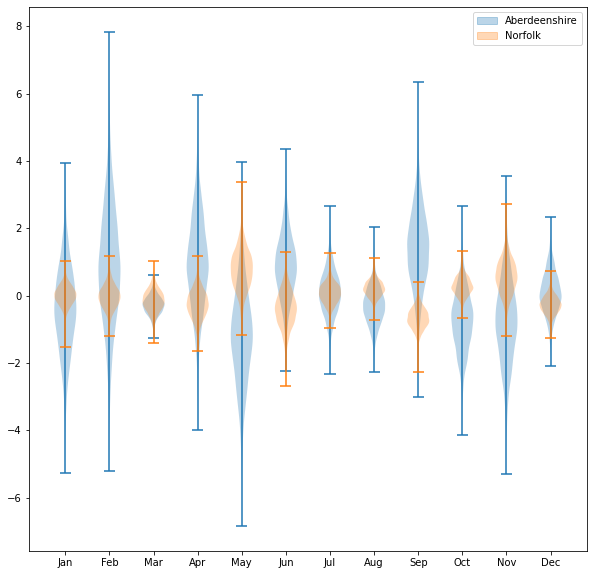

In [196]:
# changes samples to fit (shape 35,4000) not right
plt.figure(figsize=(10,10))
import matplotlib.patches as mpatches

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))


# plt.violinplot(fit['s_temp'].T[:,0,:]);
add_label(plt.violinplot(fit['s_temp'].T[:,:,0]), f'{states[0]}')
# plt.violinplot(fit['s_temp'].T[:,1,:]);
add_label(plt.violinplot(fit['s_temp'].T[:,:,1]), f'{states[1]}');
plt.xticks(range(1,13),wheat_temp.columns);
plt.legend(*zip(*labels), loc=1)


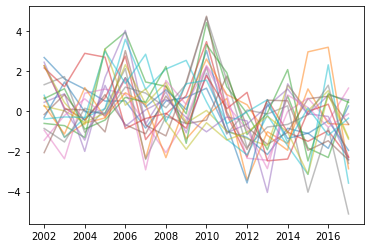

In [182]:
for s in range(0,4000,200):  # changed from 2000 to 600 for wheat  what is s, just a sample of the sample yield predictions?
    plt.plot(range(2002,2018),fit['d_yields_pred'].T[s,:,0].T,alpha=0.5)

In [95]:

'''
INvestigation
'''
# for s in range(0,2000,100):
fit['d_yields_pred'].T[599,:,0] #shape is (600,35,2)

array([ 0.51052483, -1.74263848, -1.01088034,  0.7352297 ,  1.67735328,
        0.28645156, -0.98490011,  1.51170648, -0.23198035,  0.00565775,
       -2.04082713, -0.38324707, -2.7035982 ,  1.26825777, -0.77402133,
        0.31670411,  1.08620078,  0.06845404,  1.07508806, -1.92344693,
       -0.68759142,  0.9757343 , -1.05048518, -0.9683349 , -0.32427073,
       -0.40325483,  0.62120506, -0.21837193, -0.95314171, -0.26032657,
        1.12459337,  0.71459718, -0.23363431,  0.24094911,  0.92243474])

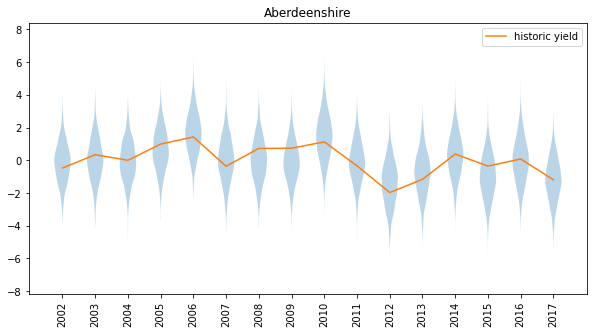

In [186]:
plt.figure(figsize=(10,5))
# plt.violinplot(fit['d_yields_pred'][:,0,:].T,showextrema=False); transpose the d_yields_pred and change the slice (0 to the end because thats where the index is only 2)
plt.violinplot(fit['d_yields_pred'].T[:,:,0],showextrema=False);
plt.xticks(range(1,17),np.arange(2002,2018),rotation=90);
plt.plot(range(1,17),data['d_yields'][0,:], label='historic yield')
plt.title(states[0])
plt.legend()


No handles with labels found to put in legend.


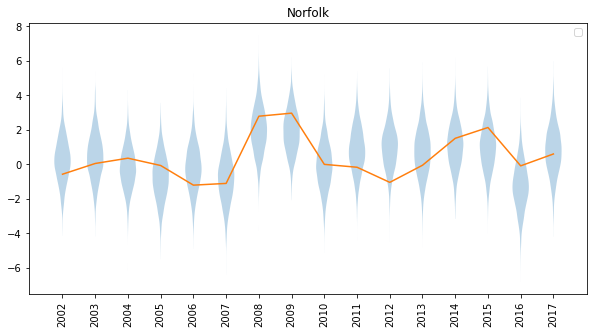

In [189]:

plt.figure(figsize=(10,5))
plt.violinplot(fit['d_yields_pred'].T[:,:,1],showextrema=False);
plt.xticks(range(1,17),np.arange(2002,2018),rotation=90);
plt.plot(range(1,17),data['d_yields'][1,:])
plt.title(states[1])
plt.legend()


In [98]:
type(data['d_yields'])

numpy.ndarray

In [99]:
data['d_yields'].shape

(2, 35)